In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [79]:
Species_df_train = pd.read_csv("Train.csv", encoding='latin-1')

Species_df_test = pd.read_csv("Test.csv", encoding='latin-1')

In [80]:
Species_df_train.isnull().sum()

Elevation     0
Aspect        0
Slope         0
HdistWater    0
VdistWater    0
HdistRoad     0
Shade9        0
Shade12       0
Shade3        0
HdistFire     0
WArawah       0
Waneota       0
Wacomanche    0
Wacache       0
Soil1         0
Soil2         0
Soil3         0
Soil4         0
Soil5         0
Soil6         0
Soil7         0
Soil8         0
Soil9         0
Soil10        0
Soil11        0
Soil12        0
Soil13        0
Soil14        0
Soil15        0
Soil16        0
Soil17        0
Soil18        0
Soil19        0
Soil20        0
Soil21        0
Soil22        0
Soil23        0
Soil24        0
Soil25        0
Soil26        0
Soil27        0
Soil28        0
Soil29        0
Soil30        0
Soil31        0
Soil32        0
Soil33        0
Soil34        0
Soil35        0
Soil36        0
Soil37        0
Soil38        0
Soil39        0
Soil40        0
Target        0
dtype: int64

In [81]:
Species_df_train.describe()

,Elevation,Aspect,Slope,HdistWater,VdistWater,HdistRoad,Shade9,Shade12,Shade3,HdistFire,...,Soil32,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Target
count,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,...,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000
mean,2958.652931,155.627665,14.104725,269.375518,46.437189,2350.882487,212.140493,223.311488,142.521852,1982.101396,...,0.089933,0.077398,0.002763,0.003281,0.000193,0.000518,0.026679,0.023751,0.015035,0.364003
std,280.417530,111.845819,7.500245,212.619856,58.291467,1559.971710,26.809926,19.785907,38.309003,1326.750810,...,0.286086,0.267223,0.052491,0.057187,0.013907,0.022758,0.161144,0.152274,0.121692,0.481150
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2808.000000,58.000000,9.000000,108.000000,7.000000,1104.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1998.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3331.000000,231.000000,237.000000,168.000000,2552.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3858.000000,360.000000,66.000000,1397.000000,599.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
corr = Species_df_train.corr().abs()
for column in Species_df_train.columns:
    c_out = corr[column]
    print('')
    print(c_out.sort_values(ascending=False)[c_out>0.8])


Elevation    1.0
Name: Elevation, dtype: float64

Aspect    1.0
Name: Aspect, dtype: float64

Slope    1.0
Name: Slope, dtype: float64

HdistWater    1.0
Name: HdistWater, dtype: float64

VdistWater    1.0
Name: VdistWater, dtype: float64

HdistRoad    1.0
Name: HdistRoad, dtype: float64

Shade9    1.0
Name: Shade9, dtype: float64

Shade12    1.0
Name: Shade12, dtype: float64

Shade3    1.0
Name: Shade3, dtype: float64

HdistFire    1.0
Name: HdistFire, dtype: float64

WArawah    1.0
Name: WArawah, dtype: float64

Waneota    1.0
Name: Waneota, dtype: float64

Wacomanche    1.0
Name: Wacomanche, dtype: float64

Wacache    1.0
Name: Wacache, dtype: float64

Soil1    1.0
Name: Soil1, dtype: float64

Soil2    1.0
Name: Soil2, dtype: float64

Soil3    1.0
Name: Soil3, dtype: float64

Soil4    1.0
Name: Soil4, dtype: float64

Soil5    1.0
Name: Soil5, dtype: float64

Soil6    1.0
Name: Soil6, dtype: float64

Soil7    1.0
Name: Soil7, dtype: float64

Soil8    1.0
Name: Soil8, dtype: float64


In [92]:
scaler = MinMaxScaler()

Species_df_train_new = scaler.fit_transform(Species_df_train)
Species_df_train_new = pd.DataFrame(Species_df_train_new, columns = Species_df_train.columns)
Species_df_train_new.head()

,Elevation,Aspect,Slope,HdistWater,VdistWater,HdistRoad,Shade9,Shade12,Shade3,HdistFire,...,Soil32,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Target
0,0.684842,0.783333,0.212121,0.176807,0.262953,0.124491,0.712598,0.944882,0.783465,0.189182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.097549,0.047222,0.378788,0.239800,0.060881,0.096248,0.751969,0.700787,0.448819,0.100516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.157079,0.827778,0.439394,0.163207,0.366580,0.089363,0.496063,0.846457,0.874016,0.120591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.712356,0.875000,0.015152,0.167502,0.246114,0.836026,0.850394,0.933071,0.625984,0.067475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.468234,0.233333,0.106061,0.176807,0.246114,0.431783,0.909449,0.893701,0.507874,0.915795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
Species_df_test_new = scaler.fit_transform(Species_df_test)
Species_df_test_new = pd.DataFrame(Species_df_test_new, columns = Species_df_test.columns)

In [86]:
y_train = Species_df_train_new.Target
X_train = Species_df_train_new.drop(['Target'],axis=1)

y_test = Species_df_test_new.Target
X_test = Species_df_test_new.drop(['Target'],axis=1)

In [90]:
RF_model = RandomForestClassifier(criterion = "entropy", max_features = "auto")

params = {'n_estimators':[500]}

rf = GridSearchCV(RF_model, params, cv=3)
rf.fit(X_train, y_train)
rf.best_params_

{'n_estimators': 500}

0.9945247015292771


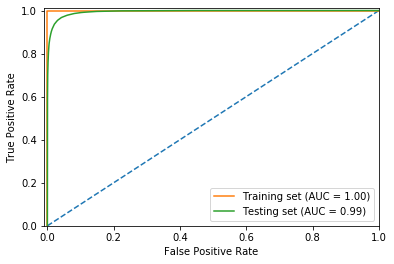

In [91]:
rfpreds_train = rf.best_estimator_.predict_proba(X_train).T[1]
fpr1, tpr1, thresh1 = roc_curve(y_train, rfpreds_train)
roc_auc_train= roc_auc_score(y_train, rfpreds_train)

rfpreds_test = rf.best_estimator_.predict_proba(X_test).T[1]
fpr2, tpr2, thresh2 = roc_curve(y_test, rfpreds_test)
roc_auc_test= roc_auc_score(y_test, rfpreds_test)
print(roc_auc_test)

# Plot the ROC curves
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, label='Training set (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr2, tpr2, label='Testing set (AUC = %0.2f)' % roc_auc_test)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()

20: 0.9918581987116253

100: 0.9942057217527102

200: 0.9944500848365416

500: 0.9945247015292771

In [70]:
aboost = AdaBoostClassifier()

params4 = {'learning_rate': [.5, 1]}

ab = GridSearchCV(aboost, params4, cv=3)
ab.fit(X_train, y_train)
ab.best_params_

{'learning_rate': 1}

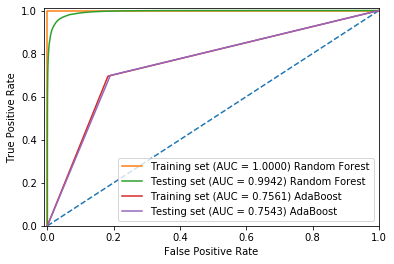

In [77]:
rfpreds_train = rf.best_estimator_.predict_proba(X_train).T[1]
fpr1, tpr1, thresh1 = roc_curve(y_train, rfpreds_train)
roc_auc_train1= roc_auc_score(y_train, rfpreds_train)

rfpreds_test = rf.best_estimator_.predict_proba(X_test).T[1]
fpr2, tpr2, thresh2 = roc_curve(y_test, rfpreds_test)
roc_auc_test2= roc_auc_score(y_test, rfpreds_test)

abpreds_train = ab.best_estimator_.predict(X_train)
fpr3, tpr3, thresh3 = roc_curve(y_train, abpreds_train)
roc_auc_train3= roc_auc_score(y_train, abpreds_train)

abpreds_test = ab.best_estimator_.predict(X_test)
fpr4, tpr4, thresh4 = roc_curve(y_test, abpreds_test)
roc_auc_test4= roc_auc_score(y_test, abpreds_test)

# Plot the ROC curves
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, label='Training set (AUC = %0.4f) Random Forest' % roc_auc_train1)
plt.plot(fpr2, tpr2, label='Testing set (AUC = %0.4f) Random Forest' % roc_auc_test2)
plt.plot(fpr3, tpr3, label='Training set (AUC = %0.4f) AdaBoost' % roc_auc_train3)
plt.plot(fpr4, tpr4, label='Testing set (AUC = %0.4f) AdaBoost' % roc_auc_test4)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()

In [75]:
print('Test Set AUC:',roc_auc_test2)

Test Set AUC: 0.9942057217527102
